Q1) Sintomas de dor lombar. A dor lombar pode ser causada por uma variedade de problemas em
qualquer parte da complexa rede interconectada de músculos da coluna vertebral, nervos, ossos, discos ou
tendões na coluna lombar. Embora a dor lombar seja extremamente comum, os sintomas e a gravidade da dor
lombar variam muito. Uma simples distensão do músculo lombar pode ser excruciante o suficiente para exigir
uma visita à sala de emergência, enquanto um disco em degeneração pode causar apenas desconforto leve e
intermitente. O conjunto de dados (Dataset_spine.csv) será utilizado para identificar que uma pessoa está
anormal ou normal. São 310 observações com 13 atributos (12 preditores numéricos e classe binária). Os
atributos são:<br>


* Col1 = pelvic incidence
* Col2 = pelvic tilt
* Col3 = lumbar lordosis angle
* Col4 = sacral slope
* Col5 = pelvic radius
* Col6 = degree spondylolisthesis
* Col7 = pelvic slope
* Col8 = Direct tilt
* Col9 = thoracic slope
* Col10 = cervical tilt
* Col11 = sacrum angle
* Col12 = scoliosis slope
* Class: Abnormal or Normal




##PASSOS DA CATEGORIZAÇÃO

* INICIALIZAÇÃO

* CARREGAMENTO BASE

* CONVERSÃO DE ATRIBUTOS CATEGÓRICOS EM BINÁRIO

* DIVISÃO EM TREINO E TESTE

* TREINAMENTO DA REDE NEURAL

* AVALIAÇÃO DE RESULTADOS




#Início

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/My Drive/Colab Topicos")

In [3]:
!ls

auto_mpg.csv  casasBoston.csv  Dataset_spine.csv  kddCup.txt  vinho.txt
cars.csv      concreto.csv     Espaço.csv	  Ratos.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df1 = pd.read_csv('Dataset_spine.csv', header=0)
df1.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


##Estrutura dos dados

In [6]:
df1.shape

(310, 13)

In [7]:
df1.dtypes

Col1         float64
Col2         float64
Col3         float64
Col4         float64
Col5         float64
Col6         float64
Col7         float64
Col8         float64
Col9         float64
Col10        float64
Col11        float64
Col12        float64
Class_att     object
dtype: object

#Conversão de atributos categóricos em binário (Encoder)

In [11]:
df1['Class_att'] = df1['Class_att'].astype('category')
df1['Class_att'].dtypes

CategoricalDtype(categories=['Abnormal', 'Normal'], ordered=False)

In [12]:
df1.dtypes

Col1          float64
Col2          float64
Col3          float64
Col4          float64
Col5          float64
Col6          float64
Col7          float64
Col8          float64
Col9          float64
Col10         float64
Col11         float64
Col12         float64
Class_att    category
dtype: object

#Divisão dos dados

In [13]:
import random
np.random.seed(1) #semente inicial


In [14]:
nlinhas = df1.shape[0]
nlinhas

310

In [39]:
# divisão dos dados entre treino e teste

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1.loc[:,'Col1':'Col12'], df1.loc[:,'Class_att'], test_size=0.1)
                                 
                                 # train_test_split(-----------inputs--------------------,-----outputs-----, percentual para teste)  

# x_train -> entrada de dados para treino - 80% dos dados de input
# y_train -> rotulos de dados para treino - 80% dos dados de output

# x_test -> entrada de dados para teste - 20% dos dados de input
# y_test -> rotulos de dados para teste - 20% dos dados de output

In [16]:
x_train.shape

(186, 12)

In [17]:
y_train.shape

(186,)

In [18]:
x_test.shape

(124, 12)

In [19]:
y_test.shape

(124,)

In [40]:
from sklearn import preprocessing
preprocessParams = preprocessing.StandardScaler().fit(x_train)
# nessa normalização o valor é subtraído da média e o resultado é dividido pelo desvio padrão.
# elimina o viés do tamanho do dado, ou seja, sua ordem de grandeza. O que interessa é a importância do dado.

In [41]:
X_train_normalized = preprocessParams.transform(x_train)
X_test_normalized  = preprocessParams.transform(x_test)
# gera um objeto não dataframe

In [42]:
X_train_normalized = pd.DataFrame(X_train_normalized, columns = x_train.columns.values)
X_test_normalized = pd.DataFrame(X_test_normalized, columns = x_test.columns.values)

In [43]:
X_train_normalized.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
0,1.095624,0.635911,-0.603661,0.928929,-1.441899,0.269258,0.722942,0.893176,0.465741,1.612604,1.126605,0.562007
1,0.201415,-0.467338,0.718107,0.610158,-2.098687,0.769844,-0.670862,0.376754,-0.761951,1.059041,-0.673515,-0.380086
2,-1.972361,-0.665061,-2.045578,-2.033051,0.542009,-0.945277,-0.265578,-1.315857,-1.288384,1.339016,-0.457986,1.710804
3,-0.541538,-1.067868,-1.136384,0.107577,0.015687,-0.710798,-1.511317,1.651432,0.027786,0.041269,0.393393,0.557235
4,0.824966,-0.175189,0.355327,1.191305,-0.934757,-0.667790,-1.231526,-0.372394,0.773816,-0.479918,-1.508167,-0.866607


In [44]:
# alguns dados estatisticos por atributo apos normalizar
X_train_normalized.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02
mean,-8.284890e-16,2.914833e-16,-6.048527e-17,6.979682e-16,7.978484e-17,-4.934325e-17,-2.471142e-16,-5.282513e-16,2.546748e-16,-2.089129e-16,4.615981e-17,4.934325e-17
std,1.001797e+00,1.001797e+00,1.001797e+00,1.001797e+00,1.001797e+00,1.001797e+00,1.001797e+00,1.001797e+00,1.001797e+00,1.001797e+00,1.001797e+00,1.001797e+00
min,-1.972361e+00,-2.373436e+00,-2.045578e+00,-2.183058e+00,-3.572032e+00,-9.703220e-01,-1.635109e+00,-1.643729e+00,-1.761718e+00,-1.701271e+00,-1.719357e+00,-1.773299e+00
25%,-8.018048e-01,-6.807678e-01,-8.079591e-01,-6.974695e-01,-5.397681e-01,-6.445243e-01,-8.670320e-01,-9.680921e-01,-7.728781e-01,-8.348171e-01,-8.495489e-01,-8.179200e-01
50%,-9.745001e-02,-1.419746e-01,-1.034743e-01,-4.296963e-02,3.149954e-02,-4.022309e-01,-7.706868e-03,3.567034e-02,-6.588876e-02,9.343248e-03,-3.776417e-02,-7.199924e-02
75%,7.028934e-01,4.660351e-01,5.914841e-01,7.440912e-01,5.608087e-01,3.950658e-01,7.809966e-01,8.888064e-01,8.048244e-01,8.513424e-01,8.659042e-01,8.163896e-01
max,4.018167e+00,3.150662e+00,3.967227e+00,5.835689e+00,3.368342e+00,1.017863e+01,1.872313e+00,1.782200e+00,1.866608e+00,1.700597e+00,1.718696e+00,1.747223e+00


In [45]:
from keras import Model, Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
# SGD = gradiente descendente estocático

In [46]:
numClasses = len(y_train.values.categories) # sabemos que são 2 categoria
numClasses

2

In [47]:
# Criar encoder para classe: categórico para numérico
# é necessário, não trabalha com categórico letras. Ver RN_Aula01.ipynb, o dado é categórico numérico, não precisou desse tratamento de dados.
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
labelencoder_y = labelencoder_y.fit(y_train)

labelencoder_y.classes_

array(['Abnormal', 'Normal'], dtype=object)

In [48]:
#aplicar encoder no treino e no teste
y_train = labelencoder_y.transform(y_train)
y_test  = labelencoder_y.transform(y_test)

In [59]:
RN = Sequential()
RN.add(Dense(7,input_shape = X_train_normalized.shape[1:],activation = 'sigmoid'))
           # 7 é o número de neurônios
           # input_shape é a tamanho do input, que é 30. Neste formato fica automatizado
RN.add(Dense(numClasses,activation = 'sigmoid'))
           # numClasses = 2. Neste formato fica automatizado
RN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 7)                 91        
                                                                 
 dense_5 (Dense)             (None, 2)                 16        
                                                                 
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________


In [60]:
from tensorflow.keras.utils import to_categorical

In [61]:
# configuração e treinamento da rede neural 

sgd = SGD(learning_rate=0.1, decay=1e-6, momentum=0.9)
RN.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics = ['accuracy'])
trainedRN = RN.fit(X_train_normalized,to_categorical(y_train),
                            epochs = 500, verbose = 1) # configuração e treinamento da rede neural 
          # RN.fit(dados de entrada,dados de saída,loops de treinamento, mostar metrica por loop, ou seja o loss e metrics)    

Epoch 1/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2654 - accuracy: 0.6523
Epoch 2/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2647 - accuracy: 0.6523
Epoch 3/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2640 - accuracy: 0.6487
Epoch 4/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2634 - accuracy: 0.6487
Epoch 5/500
9/9 [==============================] - 0s 3ms/step - loss: 0.2627 - accuracy: 0.6487
Epoch 6/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2621 - accuracy: 0.6487
Epoch 7/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.6487
Epoch 8/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2608 - accuracy: 0.6487
Epoch 9/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.6487
Epoch 10/500
9/9 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.6523
Epoch 11/500
9/9 [===========

In [62]:
# Avaliar base de teste
score = trainedRN.model.evaluate(X_test_normalized, to_categorical(y_test), verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.158344104886055
Test accuracy: 0.8064516186714172


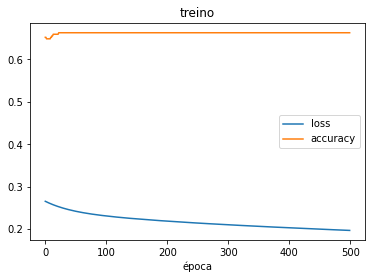

In [63]:
# Gráfico do treinamento: custo do treino e validação
import matplotlib.pyplot as plt
plt.plot(trainedRN.history['loss'], label='loss')
plt.plot(trainedRN.history['accuracy'], label='accuracy')
plt.title('treino')
plt.xlabel('época')
plt.legend();

#Avaliação de Resultados

In [64]:
# previsões sobre os dados de teste
from sklearn.metrics import confusion_matrix
y_test_predicted = RN.predict(X_test_normalized)
y_test_predicted_indexes = np.argmax(y_test_predicted,axis=1)
y_test_indexes = y_test

In [65]:
y_test_predicted

array([[0.54822564, 0.43478152],
       [0.6359688 , 0.39891553],
       [0.62179184, 0.41222262],
       [0.7031433 , 0.32849026],
       [0.60052985, 0.43318477],
       [0.7524347 , 0.24881154],
       [0.6397908 , 0.38262415],
       [0.64577234, 0.34480202],
       [0.5315514 , 0.4455973 ],
       [0.7885986 , 0.23712462],
       [0.5849563 , 0.31306309],
       [0.575476  , 0.4562779 ],
       [0.605236  , 0.38372034],
       [0.7731581 , 0.2994101 ],
       [0.77830493, 0.27009505],
       [0.6153319 , 0.4185631 ],
       [0.49084854, 0.37400508],
       [0.73726845, 0.23922431],
       [0.66933185, 0.34882322],
       [0.75498766, 0.22698802],
       [0.7664125 , 0.268112  ],
       [0.6991333 , 0.2616753 ],
       [0.7270155 , 0.25197995],
       [0.7608677 , 0.32297316],
       [0.63028044, 0.35278004],
       [0.7290223 , 0.31587052],
       [0.621179  , 0.30235994],
       [0.5433116 , 0.36878088],
       [0.72408223, 0.32301128],
       [0.7025204 , 0.2605375 ],
       [0.

In [66]:
y_test_predicted_indexes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [67]:
#matriz de confusão
confMatrix = confusion_matrix(y_test_predicted_indexes, y_test_indexes) 
confMatrix

array([[25,  6],
       [ 0,  0]])

In [68]:
# Matriz de confusão
confMatrix = pd.DataFrame(confusion_matrix(y_test_predicted_indexes, y_test_indexes), 
                                           index=['0', '1'], columns=['0', '1'],)
confMatrix.index.name = 'Actual'
confMatrix.columns.name = 'Predicted'
print(confMatrix)

Predicted   0  1
Actual          
0          25  6
1           0  0
